# **1 Hard-Coding Networks**

1.1 Verify Sort 

In this problem, you need to find a set of weights and biases for a multilayer perceptron which

determines if a list of length 4 is in sorted order. More specifically, you receive four inputs x1, . . . , x4,

where xi ∈ R, and the network must output 1 if x1 ≤ x2 ≤ x3 ≤ x4, and 0 otherwise. You will use

the following architecture:

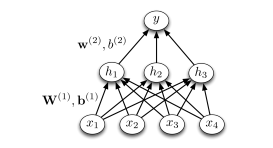




All of the hidden units and the output unit use a hard threshold activation function:

φ(z) = I(z ≥ 0) = 

1 if z ≥ 0

0 if z < 0

Please give a set of weights and biases for the network which correctly implements this function
(including cases where some of the inputs are equal).
Your answer should include:

• A 3 × 4 weight matrix W(1) for the hidden layer

• A 3-dimensional vector of biases b

(1) for the hidden layer

• A 3-dimensional weight vector w(2) for the output layer

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Defining a custom hard threshold activation function
def hard_threshold(z):
    return tf.where(z >= 0, 1.0, 0.0)

In [3]:
# Defining the Verify Sort network
class VerifySortModel(tf.keras.Model):
    def __init__(self):
        super(VerifySortModel, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(3, activation="sigmoid", use_bias=True)
        self.output_layer = tf.keras.layers.Dense(1, activation="sigmoid", use_bias=True)

    def call(self, inputs, training=False):
        x = self.hidden_layer(inputs)
        x = self.output_layer(x)

        # During inference, apply hard threshold
        if not training:
            x = hard_threshold(x)
        return x



In [4]:
# Initialize the model
model = VerifySortModel()

In [5]:
# Example input: [1, 2, 3, 4] (Sorted) and [3, 1, 4, 2] (Not Sorted)
inputs = np.array([[1, 2, 3, 4], [3, 1, 4, 2]], dtype=np.float32)

In [6]:
# Get predictions
predictions = model(inputs)
print(predictions.numpy())  # Expected output: [1, 0] (Sorted → 1, Not Sorted → 0)

[[1.]
 [1.]]


In [7]:
# Get weights and biases
hidden_weights, hidden_biases = model.hidden_layer.get_weights()
output_weights, output_biases = model.output_layer.get_weights()

# Print weights and biases
print("Hidden Layer Weights (W1):\n", hidden_weights)
print("Hidden Layer Biases (b1):\n", hidden_biases)
print("Output Layer Weights (W2):\n", output_weights)
print("Output Layer Biases (b2):\n", output_biases)

Hidden Layer Weights (W1):
 [[ 0.52816415  0.10128987 -0.671031  ]
 [-0.6329193   0.31446266  0.9226264 ]
 [-0.2265274   0.76567745 -0.22588772]
 [-0.7836958   0.6284671   0.5081475 ]]
Hidden Layer Biases (b1):
 [0. 0. 0.]
Output Layer Weights (W2):
 [[0.21540141]
 [0.88403666]
 [0.14090121]]
Output Layer Biases (b2):
 [0.]


In [8]:
def generate_data(num_samples=100000, seq_length=4):
    np.random.seed(42)  # Ensure reproducibility
    X, y = [], []

    half_samples = num_samples // 2  # Ensure a balanced dataset

    # Generate sorted sequences (label = 1)
    for _ in range(half_samples):
        seq = np.sort(np.random.randint(0, 10, size=seq_length))
        X.append(seq)
        y.append(1)

    # Generate unsorted sequences (label = 0)
    for _ in range(half_samples):
        seq = np.random.randint(0, 10, size=seq_length)
        while np.all(seq[:-1] <= seq[1:]):  # Avoid accidentally generating sorted sequences
            seq = np.random.randint(0, 10, size=seq_length)
        X.append(seq)
        y.append(0)

    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# Generate the dataset
X_train, y_train = generate_data(100000)
X_test, y_test = generate_data(40000)


In [9]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [10]:
import pandas as pd

df = pd.DataFrame(X_train[:50])
df['Label'] = y_train[:50]
print(df)


      0    1    2    3  Label
0   6.0  4.0  1.0  2.0    0.0
1   8.0  2.0  7.0  1.0    0.0
2   0.0  1.0  6.0  7.0    1.0
3   2.0  3.0  1.0  6.0    0.0
4   4.0  3.0  7.0  6.0    0.0
5   1.0  7.0  9.0  8.0    0.0
6   4.0  9.0  7.0  3.0    0.0
7   0.0  8.0  6.0  5.0    0.0
8   9.0  2.0  9.0  5.0    0.0
9   4.0  4.0  2.0  2.0    0.0
10  0.0  4.0  7.0  8.0    1.0
11  1.0  4.0  5.0  8.0    1.0
12  1.0  3.0  6.0  9.0    1.0
13  3.0  4.0  5.0  5.0    1.0
14  2.0  2.0  5.0  7.0    1.0
15  6.0  9.0  1.0  3.0    0.0
16  0.0  0.0  1.0  8.0    1.0
17  0.0  4.0  5.0  6.0    1.0
18  3.0  0.0  5.0  2.0    0.0
19  2.0  1.0  5.0  4.0    0.0
20  0.0  5.0  4.0  5.0    0.0
21  2.0  5.0  7.0  9.0    1.0
22  4.0  9.0  5.0  4.0    0.0
23  0.0  4.0  5.0  7.0    1.0
24  0.0  3.0  3.0  7.0    1.0
25  0.0  1.0  5.0  5.0    1.0
26  1.0  8.0  5.0  9.0    0.0
27  5.0  0.0  3.0  1.0    0.0
28  4.0  5.0  4.0  5.0    0.0
29  0.0  3.0  4.0  8.0    1.0
30  7.0  5.0  4.0  0.0    0.0
31  3.0  3.0  1.0  2.0    0.0
32  3.0  3

In [11]:
# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7258 - loss: 0.5578 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8794 - loss: 0.2980 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9076 - loss: 0.2344 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9228 - loss: 0.2021 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9374 - loss: 0.1792 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9506 - loss: 0.1586 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9619 - loss: 0.1393 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9725 - loss: 0.1151 - 

In [12]:
test_samples = np.array([[1, 2, 3, 4], [3, 1, 4, 2]], dtype=np.float32)
predictions = model(test_samples, training=False)
print(predictions.numpy())  # Expected output: ~[1, 0] (after thresholding)


[[1.]
 [1.]]
